In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
plt.rcParams["figure.figsize"] = (20, 10)

## 2.1.5 The Poisson distribution

The Poisson distribution is the limit of a the binomial distribution.

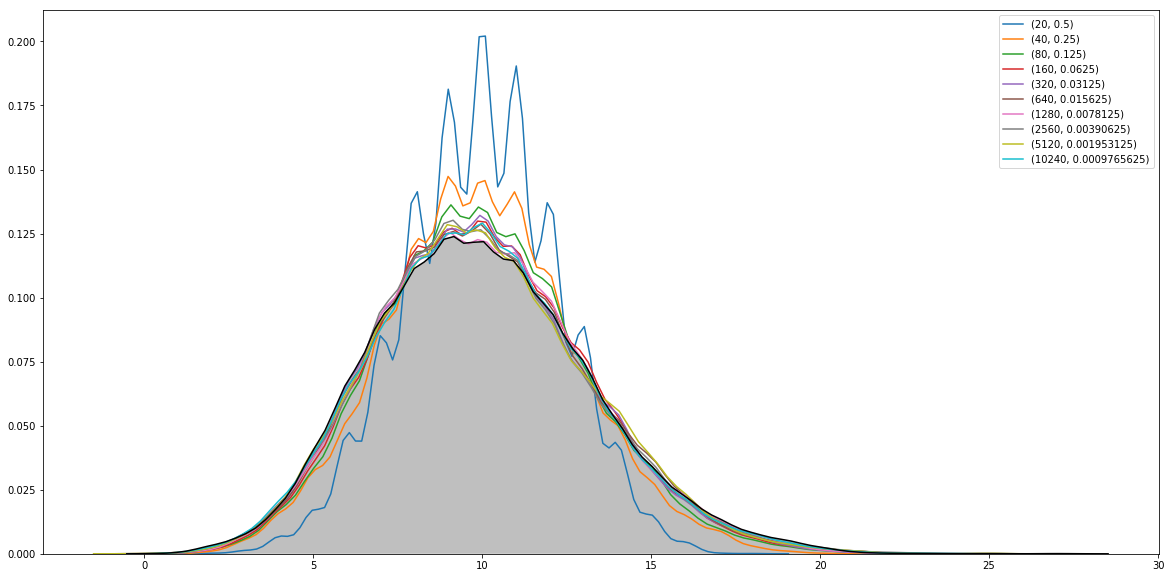

In [34]:
theta = 10
for i in range(10):
    n = 20 * (2 ** i)
    p = theta / n
    xs = np.random.binomial(n, p, size=10000)
    sns.kdeplot(xs, label=str((n, p)));

zs = np.random.poisson(10, size=10000)
sns.kdeplot(zs, color='black', shade=True);

## 2.2.1 The exponential density

The exponential density is memoryless, i.e., $P(T > t + s | T > s) = P(T > t)$.

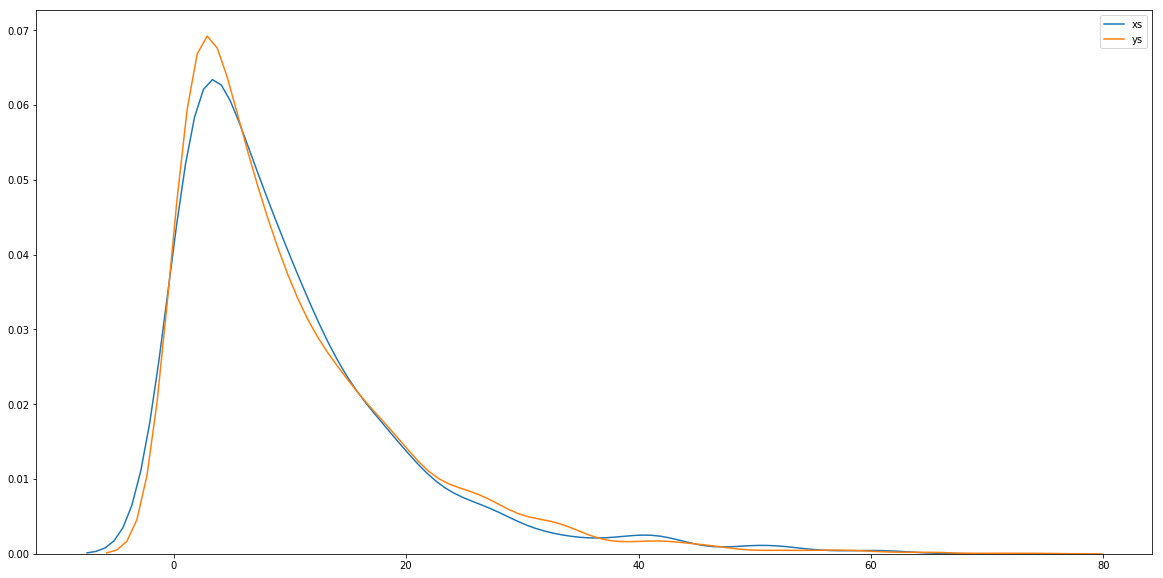

In [44]:
xs = np.random.exponential(10, size=1000)
sns.kdeplot(xs, label='xs')

ys = np.random.exponential(10, size=10000)
sns.kdeplot(ys[ys > 10] - 10, label='ys')

## The expected value of a random variable (example H)

The first moment of a Cauchy distribution does not exist, due to heavy tails.

In [85]:
def take(n, it):
    while n > 0:
        yield next(it)
        n -= 1
    return

def averages(gen):
    size = 1
    while True:
        xs = gen(size)
        size += 1
        yield xs.mean()
        
def cumulative_avgs(gen):
    x = gen(1)
    yield x.mean()
    while True:
        x = np.concatenate([x, gen(1)])
        yield x.mean() 

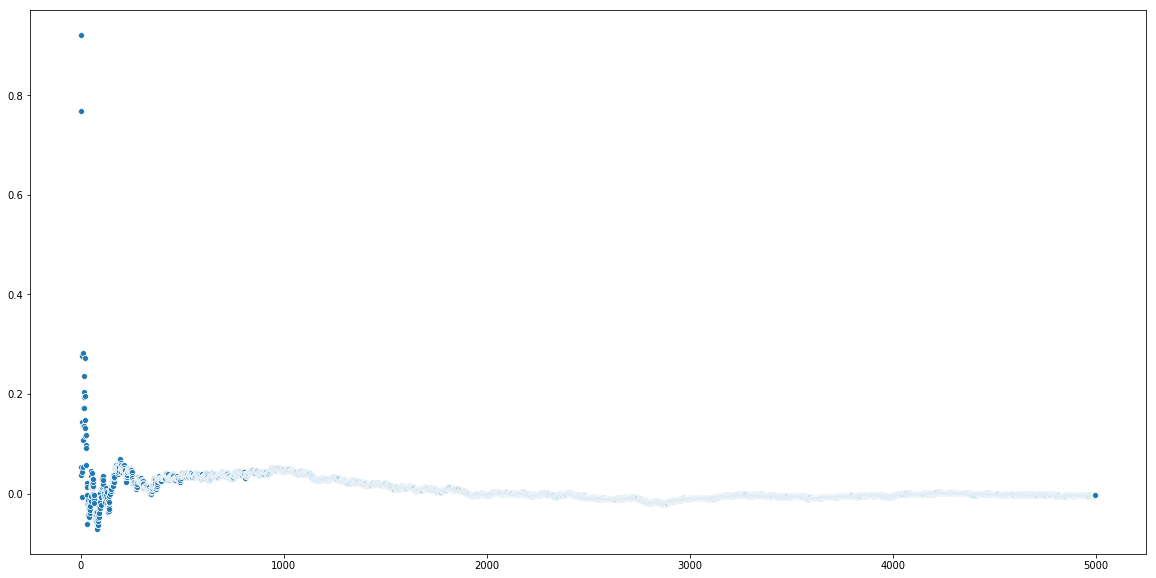

In [86]:
sns.scatterplot(range(5000), list(take(5000, cumulative_avgs(lambda sz: np.random.normal(size=sz)))));

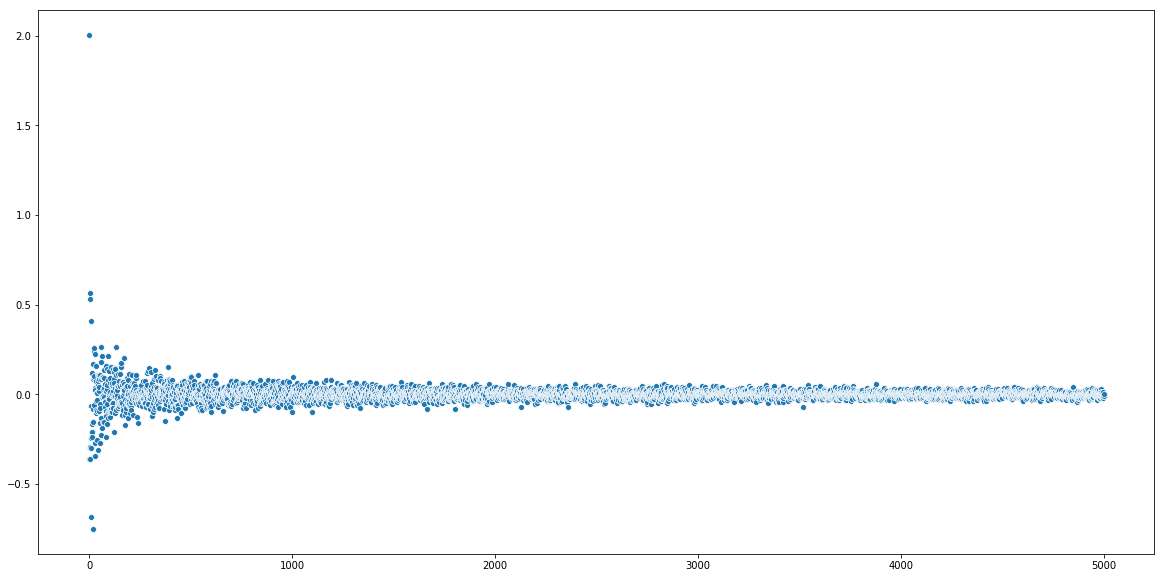

In [80]:
sns.scatterplot(range(5000), list(take(5000, averages(lambda sz: np.random.normal(size=sz)))));

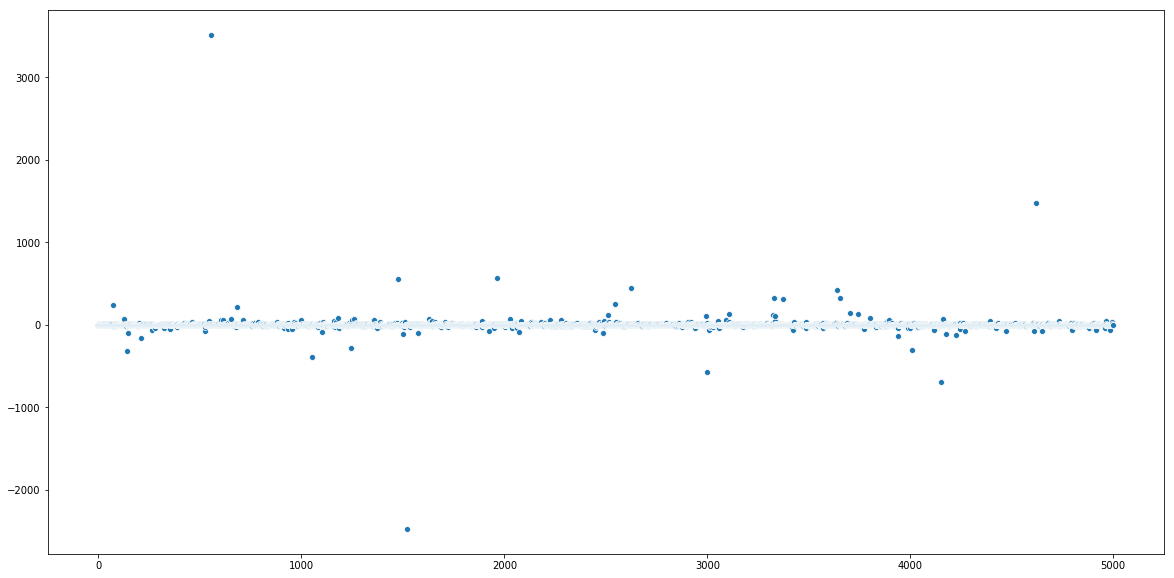

In [79]:
def cauchy(size):
    return np.random.normal(size=size) / np.random.normal(size=size)

sns.scatterplot(range(5000), list(take(5000, averages(cauchy))));

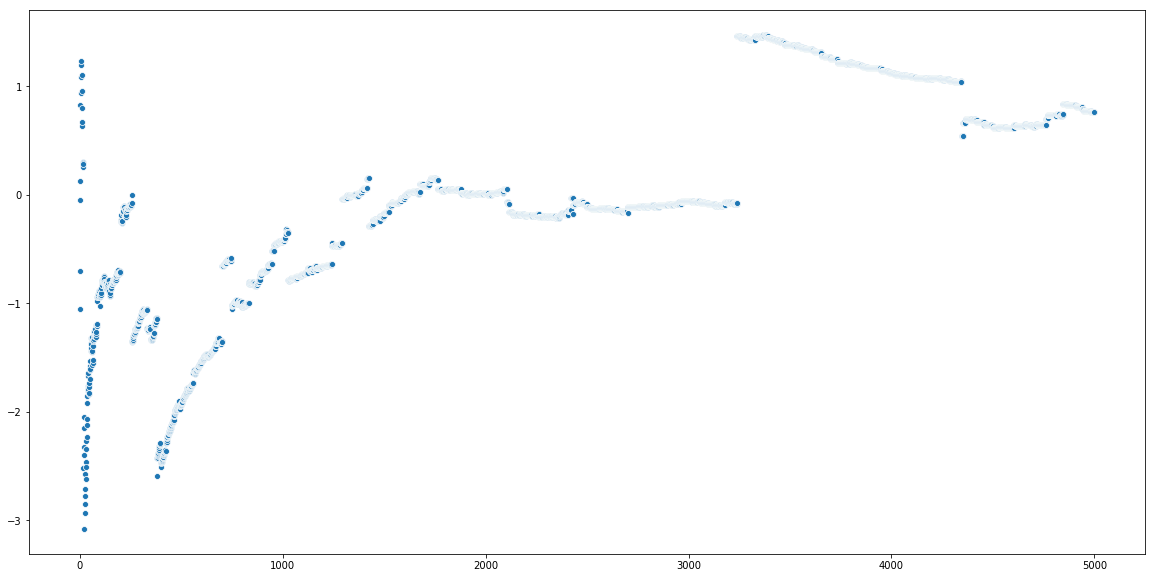

In [89]:
sns.scatterplot(range(5000), list(take(5000, cumulative_avgs(cauchy))));

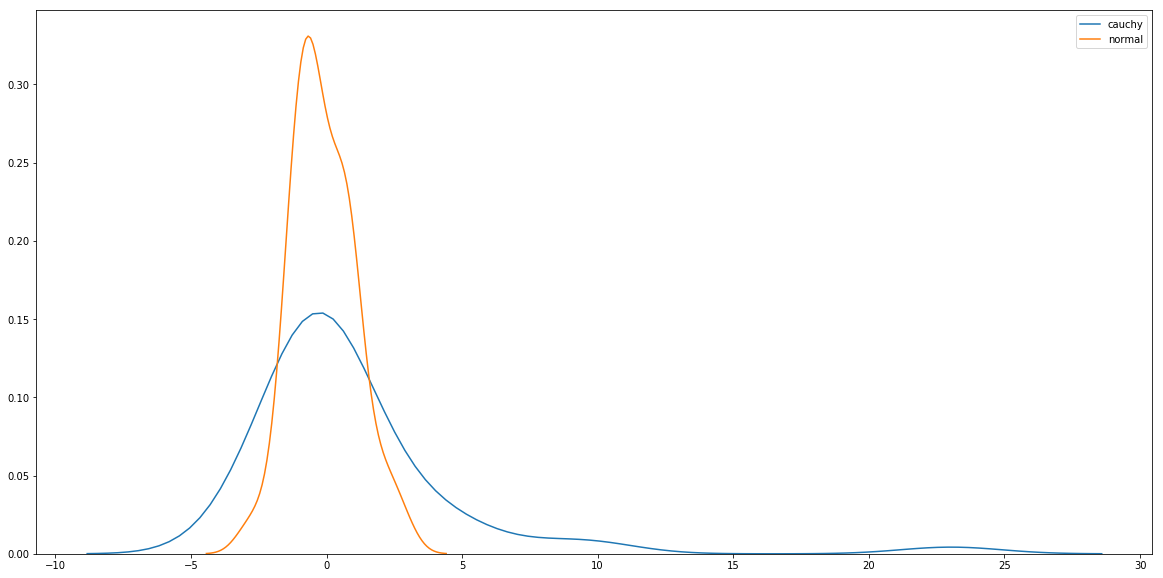

In [96]:
sns.kdeplot(cauchy(50), label='cauchy')
sns.kdeplot(np.random.normal(size=50), label='normal')